C:\Users\xamte\AppData\Local\Temp\ipykernel_2828\3414110943.py:7: DtypeWarning: Columns (0,8,10,11,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  anillamientos = pd.read_csv('../limpieza/limpio/anillamiento_familia.csv')


FileNotFoundError: [WinError 2] The system cannot find the file specified

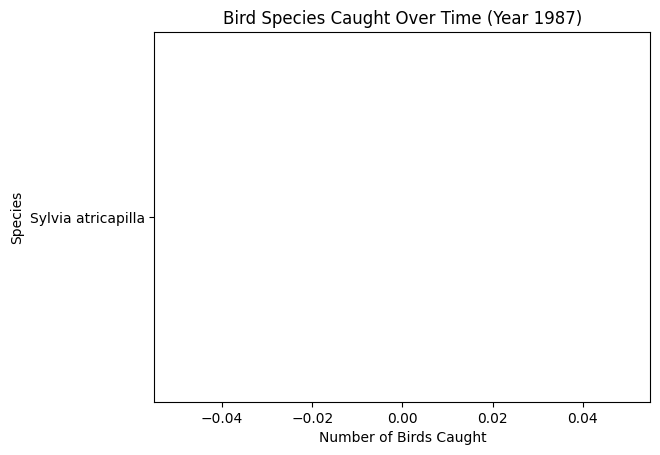

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from datetime import datetime

anillamientos = pd.read_csv('../limpieza/limpio/anillamiento_familia.csv')

anillamientos = anillamientos.dropna()

# Extract year from the 'FechaCaptura' column
anillamientos['year'] = anillamientos['FechaCaptura'].str[:4].astype(int)
# Filter out rows with years prior to 1700
anillamientos = anillamientos[anillamientos['year'] >= 1700]

# Count the number of birds caught for each species
species_counts = anillamientos['NombreEspecie'].value_counts()

# Sort species by the number of birds caught
species_counts = species_counts.sort_values(ascending=False)

# Define the figure and axis for the plot
fig, ax = plt.subplots()

# Function to update the plot for each frame of the animation
def update(frame, dataframe):
    ax.clear()
    
    # Filter data for the current year
    data_year = dataframe[dataframe['year'] <= frame]
    
    # Count the number of birds caught for each species in the current year
    species_counts_year = data_year['NombreEspecie'].value_counts()
    
    # Sort species by the number of birds caught in the current year
    species_counts_year = species_counts_year.reindex(species_counts.index)
    
    # Plot horizontal bar chart
    ax.barh(species_counts_year.index, species_counts_year.values)
    
    # Set labels and title
    ax.set_xlabel('Number of Birds Caught')
    ax.set_ylabel('Species')
    ax.set_title('Bird Species Caught Over Time (Year {})'.format(frame))
    
    # Sort species by the total number of birds caught
    species_counts_total = species_counts[:len(species_counts_year)]
    ax.invert_yaxis()  # Invert y-axis to have species with most birds caught at the top

# Define the range of years for the animation
years = range(1987, 2024)

# Create the animation
ani = FuncAnimation(fig, update, frames=years, fargs=(anillamientos,), interval=200)

# Save the animation to a file
filename = 'bird_species_animation.mp4'

writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save(filename, writer=writer)

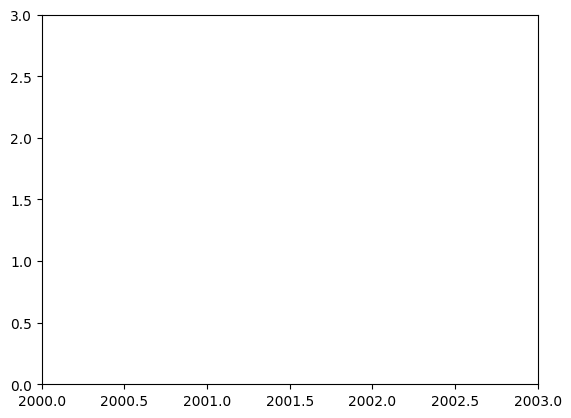

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'species': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
    'year': [2000, 2000, 2001, 2001, 2002, 2002, 2003]
}
df = pd.DataFrame(data)

# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlim(df['year'].min(), df['year'].max())
ax.set_ylim(0, len(df['species'].unique()))

# Initialize empty plot objects
bars = ax.bar([], [])
species_list = df['species'].unique()

# Update function for animation
def update(frame):
    year_data = df[df['year'] <= frame]
    species_counts = year_data['species'].value_counts().reindex(species_list, fill_value=0)
    for bar, count in zip(bars, species_counts):
        bar.set_height(count)
    return bars

# Animation
ani = FuncAnimation(fig, update, frames=range(df['year'].min(), df['year'].max() + 1), interval=500)

plt.show()